# Thesis Evaluation Results

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Read the CSV file and split into two - Rosetta, and Vitis Accel Examples.

In [61]:
eval_df = pd.read_csv('thesis-evaluation-data-latest.csv')

vitis_eval_df = eval_df[eval_df["Benchmark"] == "Vitis Accel Examples"]

rosetta_eval_df = eval_df[eval_df["Benchmark"] == "Rosetta"]

# Research Question 1: TODO ADD HERE

## 1. Vitis Accel Examples

In [62]:
vitis_apps = vitis_eval_df["Application"].unique()

- Kernel Execution Time (in `ms`) of applications in `Vitis Accel Examples`

Text(0.5, 0, 'Applications in Vitis Accel Examples')

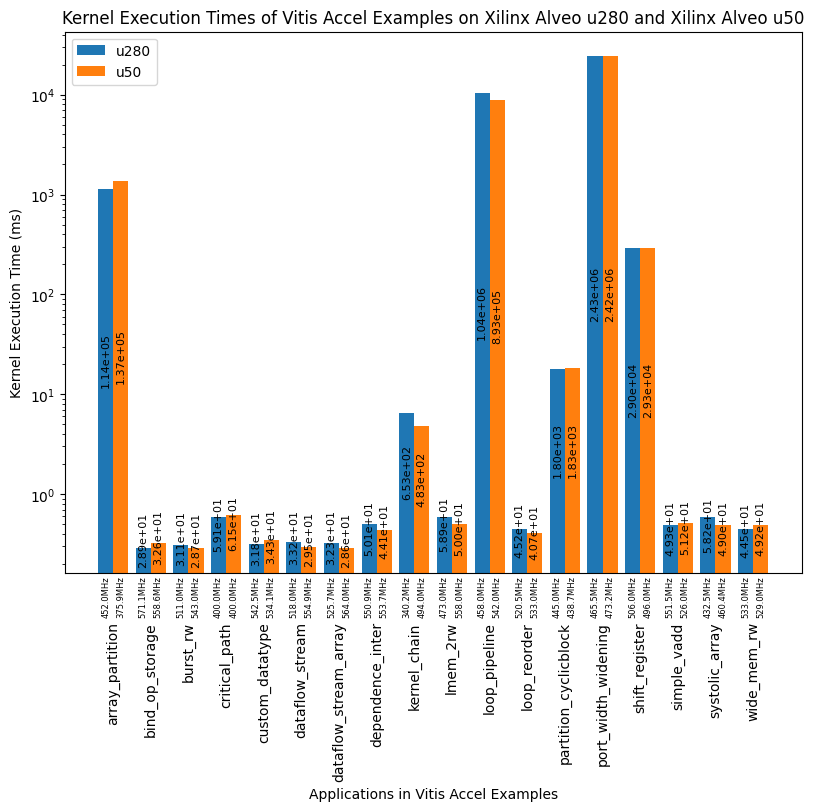

In [63]:
width, multiplier = 0.4, 0

x_tick_pos = np.arange(len(vitis_apps))
freq_ticks, freq_ticks_offset = [], []

fig, ax = plt.subplots(layout="constrained", figsize=(8, 8))

for target in vitis_eval_df["Target Device"].unique():
    offset = width * multiplier

    rects = ax.bar(
        x_tick_pos + offset,
        vitis_eval_df[vitis_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"],
        width,
        label=target
    )
    ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2e}'.format(x * 100), padding=15, rotation=90, fontsize=8)

    freq_ticks.extend([str(a) + "MHz" for a in vitis_eval_df[(vitis_eval_df["Target Device"] == target)]["Actual Clock Frequency"].values])
    freq_ticks_offset.extend([a for a in x_tick_pos + offset])

    multiplier += 1

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=1)
ax.set_ylabel("Kernel Execution Time (ms)")
ax.set_title("Kernel Execution Times of Vitis Accel Examples on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x_tick_pos + width / 2, vitis_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=35)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=2, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Vitis Accel Examples")

## I/O Throughput

\begin{equation}
    IO_{Thrpt} = \Sigma Size_{Kernel Input Buffers} / T_{Kernel Execution}
\end{equation}

Text(0.5, 0, 'Applications in Vitis Accel Examples')

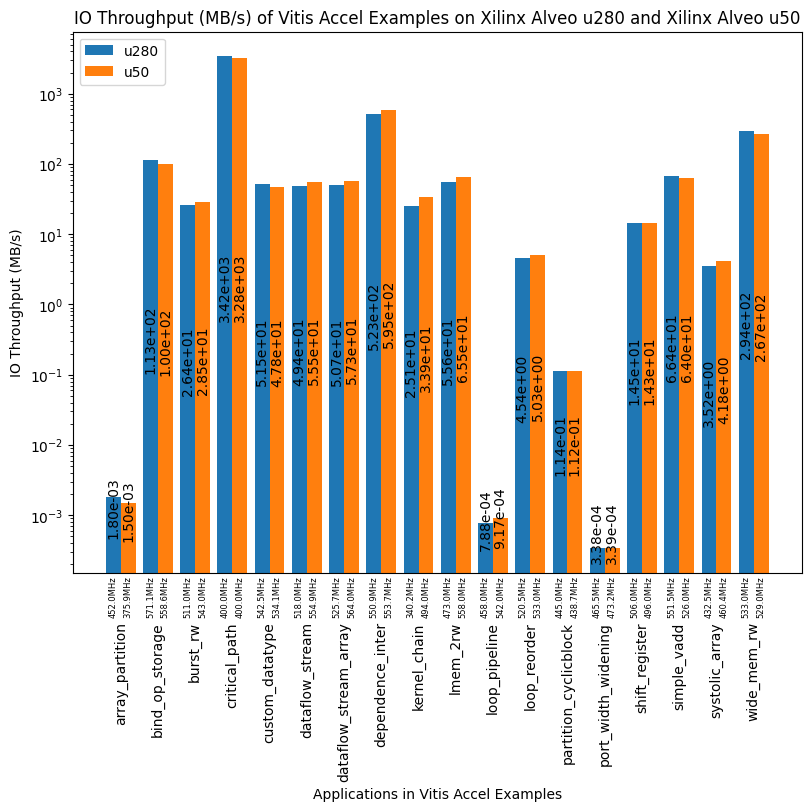

In [64]:
width, multiplier = 0.4, 0

freq_ticks, freq_ticks_offset = [], []
x_tick_pos = np.arange(len(vitis_apps))
    
fig, ax = plt.subplots(layout="constrained", figsize=(8,8))

for target in rosetta_eval_df["Target Device"].unique():
    offset = width * multiplier

    rects = ax.bar(
        x_tick_pos + offset,
        (vitis_eval_df[vitis_eval_df["Target Device"] == target]["Input Data Size in Bytes"] / vitis_eval_df[vitis_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"]) * 0.001,
        width,
        label=target
    )
    ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2e}'.format(x), padding=20, rotation=90, fontsize=10)

    freq_ticks.extend([str(a) + "MHz" for a in vitis_eval_df[(vitis_eval_df["Target Device"] == target)]["Actual Clock Frequency"].values])
    freq_ticks_offset.extend([a for a in x_tick_pos + offset])

    multiplier += 1

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=1)
ax.set_ylabel("IO Throughput (MB/s)")
ax.set_title("IO Throughput (MB/s) of Vitis Accel Examples on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x_tick_pos + width / 2, vitis_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=35)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=2, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Vitis Accel Examples")

## Relative IO Throughput

In [65]:
rel_io_thrp = vitis_eval_df[vitis_eval_df["Target Device"] == "u280"]["Kernel Execution Time (in ms)"].values / vitis_eval_df[vitis_eval_df["Target Device"] == "u50"]["Kernel Execution Time (in ms)"].values

Text(0.5, 0, 'Applications in Vitis Accel Examples')

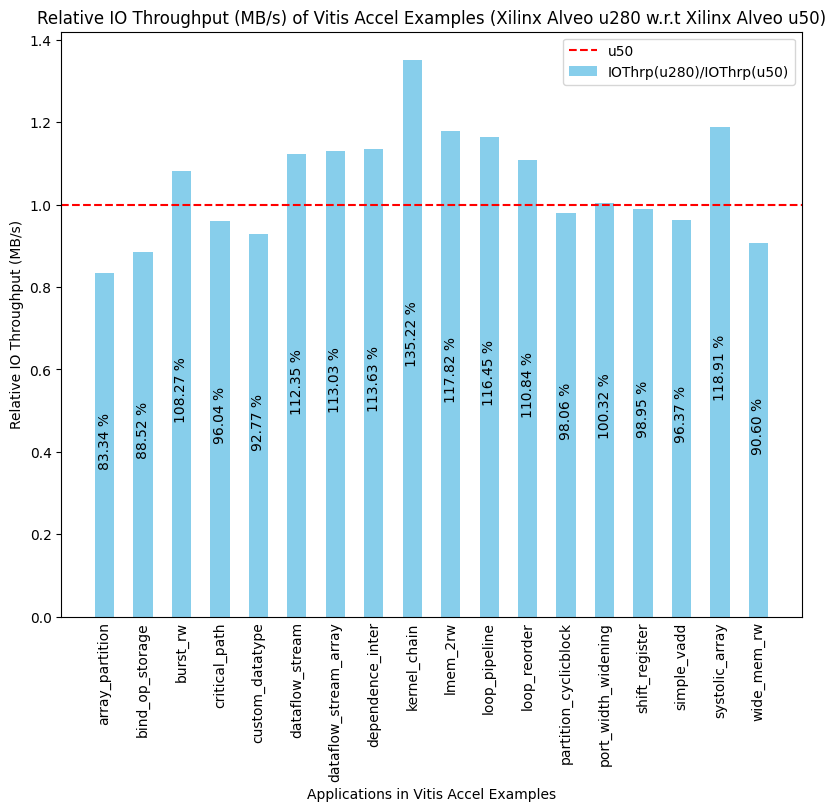

In [75]:
width, multiplier = 0.5, 0

fig, ax = plt.subplots(figsize=(8,8), layout="constrained")

x_tick_pos = np.arange(len(vitis_apps))

rects = ax.bar(
    x_tick_pos,
    rel_io_thrp,
    width,
    label="IOThrp(u280)/IOThrp(u50)",
    color="skyblue"
)
ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2f} %'.format(x * 100), padding=3, rotation=90, fontsize=10)

ax.axhline(y=1.0, color='r', ls='--', label='u50')

ax.legend(loc="upper right", ncols=1)
ax.set_ylabel("Relative IO Throughput (MB/s)")
ax.set_title("Relative IO Throughput (MB/s) of Vitis Accel Examples (Xilinx Alveo u280 w.r.t Xilinx Alveo u50)")
ax.set_xticks(x_tick_pos, vitis_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0)
ax.set_xlabel("Applications in Vitis Accel Examples")

## 2. Rosetta

In [67]:
rosetta_apps = rosetta_eval_df["Application"].unique()

- Kernel Execution Time (in `ms`) of different applications in `Rosetta`

[0.0, 1.0, 2.0, 3.0, 0.25, 1.25, 2.25, 3.25]


Text(0.5, 0, 'Applications in Rosetta')

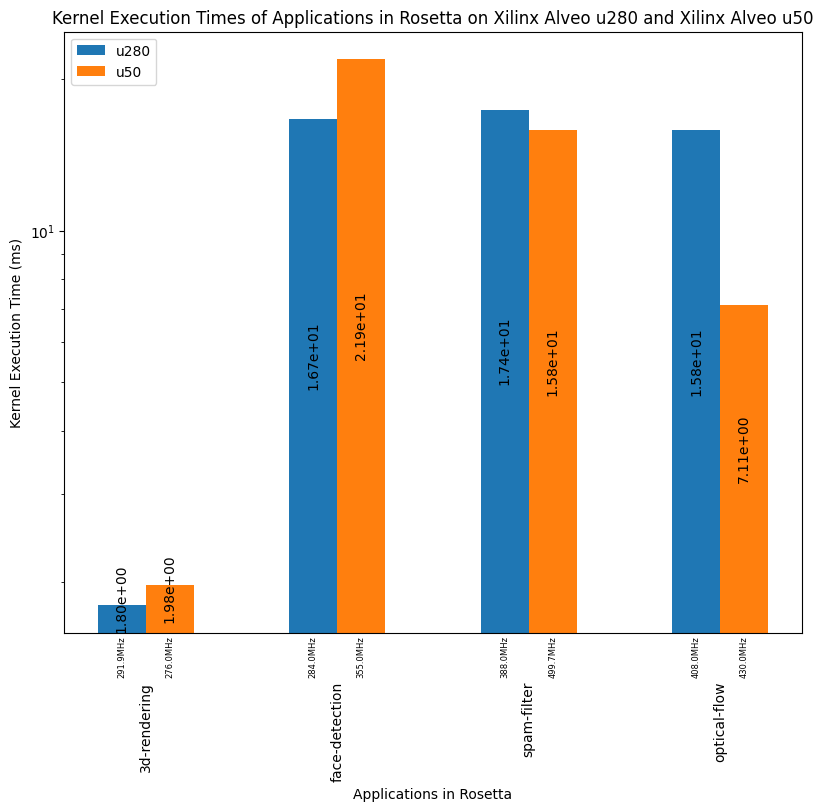

In [68]:
width, multiplier = 0.25, 0

x_tick_pos = np.arange(len(rosetta_apps))
freq_ticks, freq_ticks_offset = [], []

fig, ax = plt.subplots(layout="constrained", figsize=(8, 8))

for target in rosetta_eval_df["Target Device"].unique():
    offset = width * multiplier

    rects = ax.bar(
        x_tick_pos + offset,
        rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"],
        width,
        label=target,
    )
    ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2e}'.format(x), padding=15, rotation=90, fontsize=10)

    freq_ticks.extend([str(a) + "MHz" for a in rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Actual Clock Frequency"].values])
    freq_ticks_offset.extend([a for a in x_tick_pos + offset])

    multiplier += 1

print(freq_ticks_offset)

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=1)
ax.set_ylabel("Kernel Execution Time (ms)")
ax.set_title("Kernel Execution Times of Applications in Rosetta on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x_tick_pos + width / 2, rosetta_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=35)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=2, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Rosetta")

## I/O Throughput

\begin{equation}
    IO_{Thrpt} = \Sigma Size_{Kernel Input Buffers} / T_{Kernel Execution}
\end{equation}

In [69]:
execution_times_per_target = {}
for target in rosetta_eval_df["Target Device"].unique():
    execution_times_per_target[target] = (rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Input Data Size in Bytes"] / rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"]) * 0.001

Text(0.5, 0, 'Applications in Rosetta')

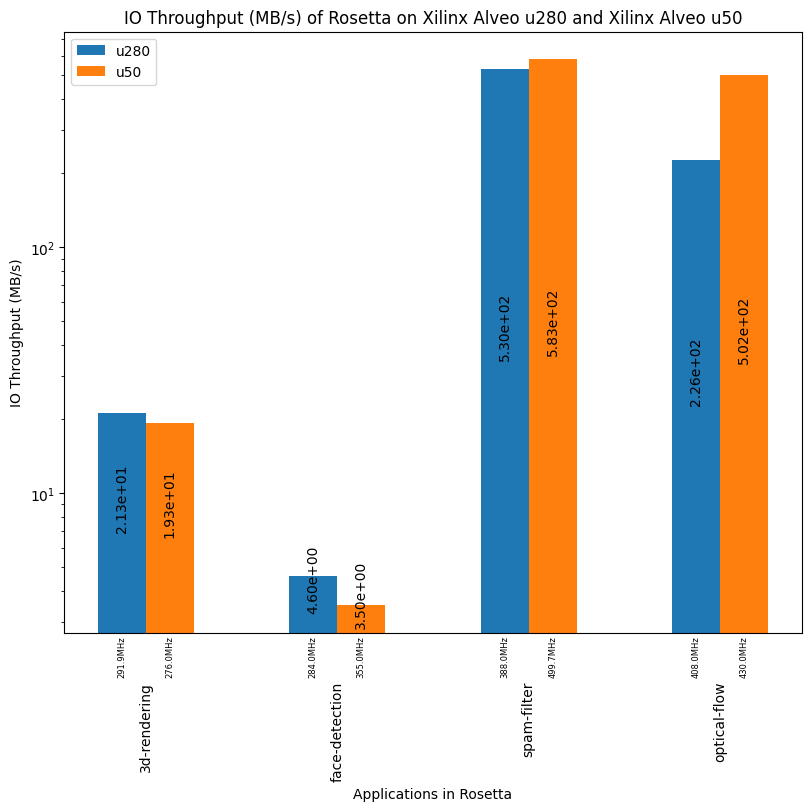

In [70]:
x_tick_pos = np.arange(len(rosetta_apps))
width, multiplier = 0.25, 0

freq_ticks, freq_ticks_offset = [], []

fig, ax = plt.subplots(layout="constrained", figsize=(8, 8))

for target in rosetta_eval_df["Target Device"].unique():
    offset = width * multiplier

    rects = ax.bar(
        x_tick_pos + offset,
        (rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Input Data Size in Bytes"] / rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"]) * 0.001,
        width,
        label=target
    )
    ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2e}'.format(x), padding=18, rotation=90, fontsize=10)

    freq_ticks.extend([str(a) + "MHz" for a in rosetta_eval_df[(rosetta_eval_df["Target Device"] == target)]["Actual Clock Frequency"].values])
    freq_ticks_offset.extend([a for a in x_tick_pos + offset])

    multiplier += 1

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=1)
ax.set_ylabel("IO Throughput (MB/s)")
ax.set_title("IO Throughput (MB/s) of Rosetta on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x_tick_pos + width / 2, rosetta_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=35)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=2, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Rosetta")

## Relative IO Throughput

In [71]:
rel_io_thrp_rosetta = rosetta_eval_df[rosetta_eval_df["Target Device"] == "u280"]["Kernel Execution Time (in ms)"].values / rosetta_eval_df[rosetta_eval_df["Target Device"] == "u50"]["Kernel Execution Time (in ms)"].values

Text(0.5, 0, 'Applications in Rosetta')

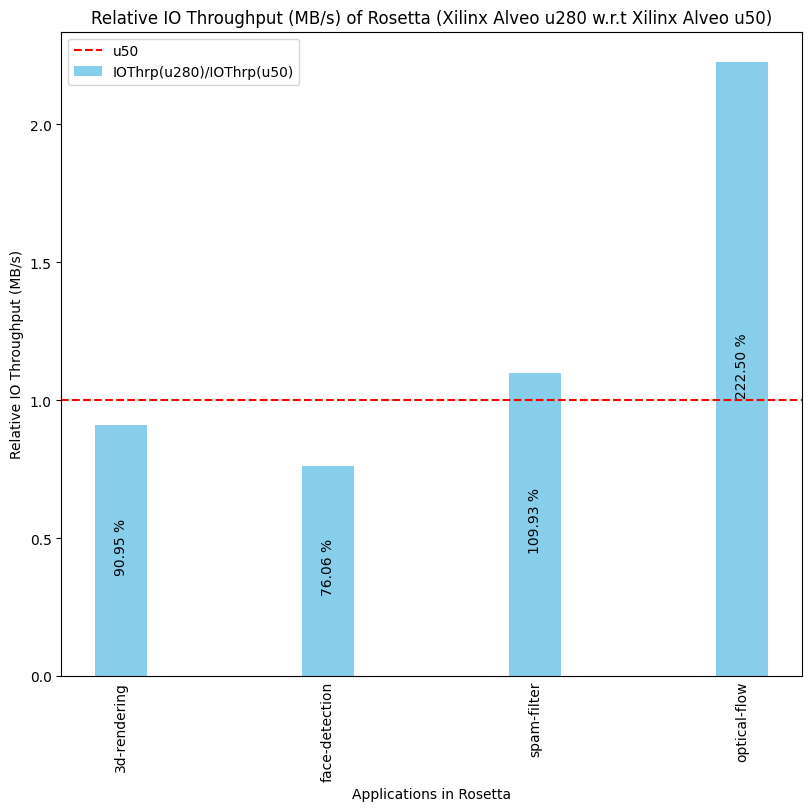

In [77]:
x_tick_pos = np.arange(len(rosetta_apps))

width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(8,8), layout="constrained")

rects = ax.bar(
    x_tick_pos,
    rel_io_thrp_rosetta,
    width,
    label="IOThrp(u280)/IOThrp(u50)",
    color="skyblue"
)
ax.bar_label(rects, label_type="center", fmt=lambda x: '{:.2f} %'.format(x * 100), padding=3, rotation=90, fontsize=10)

ax.axhline(y=1.0, color='r', ls='--', label='u50')


ax.legend(loc="upper left", ncols=1, fontsize=10)
ax.set_ylabel("Relative IO Throughput (MB/s)")
ax.set_title("Relative IO Throughput (MB/s) of Rosetta (Xilinx Alveo u280 w.r.t Xilinx Alveo u50)")
ax.set_xticks(x_tick_pos, rosetta_apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0)
ax.set_xlabel("Applications in Rosetta")

# Research Question 2: TODO ADD HERE

In [73]:
FCFS_FA_best_case = {
    3: np.sum([3.91, 5.37, 4.40]), # dataflow_stream_array, dataflow_stream, face-detection 
    5: np.sum([3.96, 16.93, 4.19, 4.18, 4.36]) # burst_rw, spam-filter, loop_reorder, systolic_array, kernel_chain
    # 7: np.sum(4.40, 6.92, )
    # 10: np.sum(4.40, 6.92, )
}

FCFS_RO_worst_case = {
    3: np.sum([5.61, 3.99, 5.81]), # dataflow_stream_array, dataflow_stream, face-detection 
    5: np.sum([5.53, 15.59, 5.63, 5.80, 5.68]) # burst_rw, spam-filter, loop_reorder, systolic_array, kernel_chain
    # 7: np.sum(4.40, 6.92, )
    # 10: np.sum(4.40, 6.92, )
}

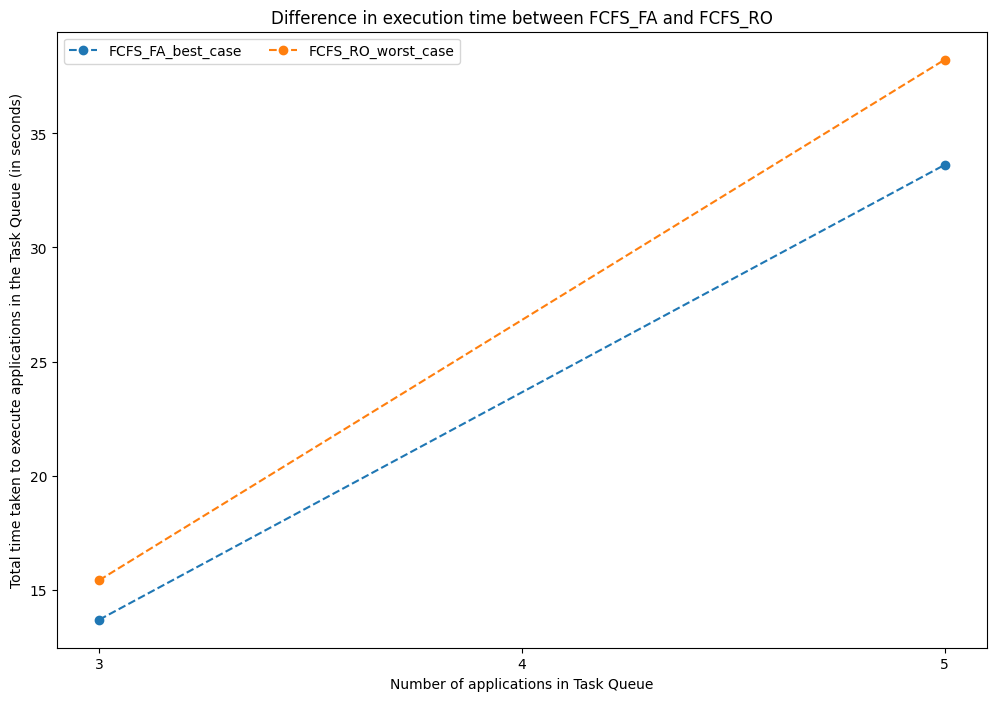

In [74]:
fig, ax = plt.subplots(figsize=(12,8)) # (layout="constrained")

ax.plot(FCFS_FA_best_case.keys(), FCFS_FA_best_case.values(), label='FCFS_FA_best_case', linestyle="--", marker="o")
ax.plot(FCFS_RO_worst_case.keys(), FCFS_RO_worst_case.values(), label='FCFS_RO_worst_case', linestyle="--", marker="o")


ax.legend(loc="upper left", ncols=2)
ax.set_ylabel("Total time taken to execute applications in the Task Queue (in seconds)")
ax.set_title("Difference in execution time between FCFS_FA and FCFS_RO")
ax.set_xlabel("Number of applications in Task Queue")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))